In [1]:
#import necessary models, https://www.youtube.com/watch?v=iMIWee_PXl8 
# https://www.youtube.com/watch?v=S0XFd0VMFss&list=PLVBorYCcu-xWahQ0u2_guKSJ-0fc8VKb2&index=6

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#RNN - Reconcuring Neural Networks, captures information about the sequences of the time series data
# are types of neural networks designed for capturing information from sequences / time series data

Recursive Formula: St = Fw(St-1,Xt)
Xt - Input at time step t
St - State at time step t
Fw - Recursive function

utilizing the the time series information and creates multilayer inputs and outputs with weights and outputs

Loss is the % value of the value that you want to converge closer to 0, you want to keep testing to lower the value


In [2]:
#everything needs to be in array in regards to the data set
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]

#results pulling the informatino through 
target = [(i+5)/100 for i in range (100)]

#may need to normalize data by dividing it by 100

In [3]:
# Setting up the array with the data source
data = np.array(Data, dtype=float)
target = np.array(target,dtype=float)

In [4]:
data.shape

(100, 5, 1)

In [5]:
target.shape

(100,)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [7]:
#RNN - using LSTM

In [8]:
model = Sequential()

In [9]:
#format for LSTM(# of Inputs), batch_input_shape(Lenght of Each Vector which is based on the Shape function above)
#return_sequences = True - returns everything at every node, False - Returns final output only

# batch_input_shape(batch_size, timesteps, data_dim) https://stackoverflow.com/questions/46982616/batch-input-shape-tuple-on-keras-lstm/46986190

neurons = 1
batch_size = None #This will be the size of your data set usually defaulted as none
timesteps = 5 # size of yoru temporal dimension or frames each sample sequence has
data_dim = 1 # vector of each of the timesteps 


model.add(LSTM((neurons),batch_input_shape=(batch_size,timesteps,data_dim), return_sequences=False))

In [10]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [12]:
#if the return_sequences from above = true, then this will error out, need to set as FALSE

history = model.fit(x_train,y_train,epochs=800,validation_data=(x_test,y_test), verbose=0)

#increasing the # of epochs will allwo the model to have better accuracy to converge

In [13]:
#predicting to help plot the information
results = model.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

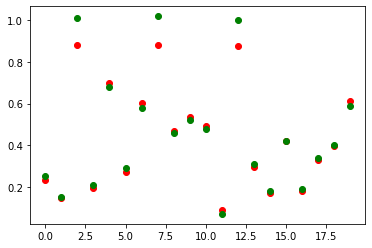

In [14]:
#plotting the results
plt.scatter(range(20),results,c='red')
plt.scatter(range(20),y_test,c='green')
plt.show

# we want the results on teh scatter to be almost exactly

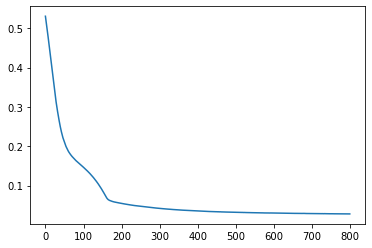

In [15]:
plt.plot(history.history['loss'])
plt.show()

In [16]:
## variable size inputs - Simple Solution - Padding to make inputs of same size or 